# Intro Data Science

# Andrés Nieto Guadarrama

In [12]:
import os
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

1. Usando el API de `AlphaVantage` descarga la información histórica de precios diaria (`TIME_SERIES_DAILY`) para los siguientes 5 tickers: `["GOOGL", "MSFT", "AAPL", "TSLA", "AMZN"]`

```
{'GOOGL': {'Meta Data': {'1. Information': 'Daily Prices (open, high, low, close) and Volumes', '2. Symbol': 'GOOGL', '3. Last Refreshed': '2020-01-13 14:48:47', '4. Output Size': 'Full size', '5. Time Zone': 'US/Eastern'}, 'Time Series (Daily)': {'2020-01-13': {'1. open': '1435.2500', '2. high': '1439.8900', '3. low': '1425.3700', '4. close': '1437.2850', '5. volume': '782014'}, '2020-01-10': {'1. open': '1429.4700', '2. high': '1434.9400', '3. low': '1419.6000', '4. close': '1428.9600', '5. volume': '1313178'}, '2020-01-09': {'1. open': '1421.9300', '2. high': '1428.6800', '3. low': '1410.2100', '4. close': '1419.7900', '5. volume': '1661438'}, '2020-01-08': {'1. open': '1394.8200', '2. high': '1411.8500', '3. low': '1392.6300', '4. close': '1405.0400...
```

# Ejs 1 y 2

In [65]:
url = "https://www.alphavantage.co"
base_url = "https://www.alphavantage.co/query"
# Cargamos el API Key de Alpha Vantage
avkey = 'UOGXB0ZV5BN965ES'
l_tickers=["GOOGL","MSFT", "AAPL", "TSLA", "AMZN"]

# day = {
#     "function": "TIME_SERIES_DAILY",
#     "symbol":"GOOGL",
#     "apikey": avkey
# }
# r = requests.get(base_url, params=day)
# data=r.json()
# df_close=pd.DataFrame(data['Time Series (Daily)']).T
# df_close=df_close.rename(columns={'4. close':'GOOGL'})
# df=df_close['GOOGL']

df=pd.DataFrame({})
for t in l_tickers:
    day = {
    "function": "TIME_SERIES_DAILY",
    "symbol":t,
    "outputsize":"full",
    "apikey": avkey
    }
    r = requests.get(base_url, params=day)
    data=r.json()
    df_close=pd.DataFrame(data['Time Series (Daily)']).T
    df_close=df_close.rename(columns={'4. close':t})
    df_aux=df_close[t]
    df=pd.concat([df, df_aux], axis=1)

{'Meta Data': {'1. Information': 'Daily Prices (open, high, low, close) and Volumes', '2. Symbol': 'GOOGL', '3. Last Refreshed': '2020-01-17', '4. Output Size': 'Full size', '5. Time Zone': 'US/Eastern'}, 'Time Series (Daily)': {'2020-01-17': {'1. open': '1462.5400', '2. high': '1480.5500', '3. low': '1456.5500', '4. close': '1479.5200', '5. volume': '2467377'}, '2020-01-16': {'1. open': '1445.4500', '2. high': '1450.7000', '3. low': '1440.0000', '4. close': '1450.1600', '5. volume': '1304040'}, '2020-01-15': {'1. open': '1433.0200', '2. high': '1440.7800', '3. low': '1431.6600', '4. close': '1439.2000', '5. volume': '1077519'}, '2020-01-14': {'1. open': '1440.0000', '2. high': '1442.6300', '3. low': '1427.7700', '4. close': '1430.5900', '5. volume': '1305636'}, '2020-01-13': {'1. open': '1435.2500', '2. high': '1441.4800', '3. low': '1425.3700', '4. close': '1440.0300', '5. volume': '1525568'}, '2020-01-10': {'1. open': '1429.4700', '2. high': '1434.9400', '3. low': '1419.6000', '4. c

C:\Users\andre\Anaconda3\lib\site-packages\ipykernel_launcher.py:32: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



{'Meta Data': {'1. Information': 'Daily Prices (open, high, low, close) and Volumes', '2. Symbol': 'MSFT', '3. Last Refreshed': '2020-01-17', '4. Output Size': 'Full size', '5. Time Zone': 'US/Eastern'}, 'Time Series (Daily)': {'2020-01-17': {'1. open': '167.4200', '2. high': '167.4675', '3. low': '165.4300', '4. close': '167.1000', '5. volume': '32775039'}, '2020-01-16': {'1. open': '164.3500', '2. high': '166.2400', '3. low': '164.0300', '4. close': '166.1700', '5. volume': '23865360'}, '2020-01-15': {'1. open': '162.6200', '2. high': '163.9400', '3. low': '162.5700', '4. close': '163.1800', '5. volume': '21417871'}, '2020-01-14': {'1. open': '163.3900', '2. high': '163.6000', '3. low': '161.7200', '4. close': '162.1300', '5. volume': '23500783'}, '2020-01-13': {'1. open': '161.7600', '2. high': '163.3100', '3. low': '161.2600', '4. close': '163.2800', '5. volume': '18666414'}, '2020-01-10': {'1. open': '162.8235', '2. high': '163.2200', '3. low': '161.1800', '4. close': '161.3400', 

{'Meta Data': {'1. Information': 'Daily Prices (open, high, low, close) and Volumes', '2. Symbol': 'AAPL', '3. Last Refreshed': '2020-01-17', '4. Output Size': 'Full size', '5. Time Zone': 'US/Eastern'}, 'Time Series (Daily)': {'2020-01-17': {'1. open': '316.2700', '2. high': '318.7400', '3. low': '315.0000', '4. close': '318.7300', '5. volume': '33454635'}, '2020-01-16': {'1. open': '313.5900', '2. high': '315.7000', '3. low': '312.0900', '4. close': '315.2400', '5. volume': '27207254'}, '2020-01-15': {'1. open': '311.8500', '2. high': '315.5000', '3. low': '309.5500', '4. close': '311.3400', '5. volume': '30480882'}, '2020-01-14': {'1. open': '316.7000', '2. high': '317.5700', '3. low': '312.1700', '4. close': '312.6800', '5. volume': '40653457'}, '2020-01-13': {'1. open': '311.6400', '2. high': '317.0700', '3. low': '311.1500', '4. close': '316.9600', '5. volume': '30028742'}, '2020-01-10': {'1. open': '310.6000', '2. high': '312.6700', '3. low': '308.2500', '4. close': '310.3300', 

{'Meta Data': {'1. Information': 'Daily Prices (open, high, low, close) and Volumes', '2. Symbol': 'TSLA', '3. Last Refreshed': '2020-01-17', '4. Output Size': 'Full size', '5. Time Zone': 'US/Eastern'}, 'Time Series (Daily)': {'2020-01-17': {'1. open': '507.6100', '2. high': '515.6699', '3. low': '503.1600', '4. close': '510.5000', '5. volume': '13399785'}, '2020-01-16': {'1. open': '493.7500', '2. high': '514.4600', '3. low': '492.1700', '4. close': '513.4900', '5. volume': '21736653'}, '2020-01-15': {'1. open': '529.7600', '2. high': '537.8400', '3. low': '516.7853', '4. close': '518.5000', '5. volume': '17368831'}, '2020-01-14': {'1. open': '544.2550', '2. high': '547.4100', '3. low': '524.9000', '4. close': '537.9200', '5. volume': '29061377'}, '2020-01-13': {'1. open': '493.5000', '2. high': '525.6300', '3. low': '492.0000', '4. close': '524.8600', '5. volume': '26307458'}, '2020-01-10': {'1. open': '481.7900', '2. high': '484.9400', '3. low': '473.7000', '4. close': '478.1500', 

{'Meta Data': {'1. Information': 'Daily Prices (open, high, low, close) and Volumes', '2. Symbol': 'AMZN', '3. Last Refreshed': '2020-01-17', '4. Output Size': 'Full size', '5. Time Zone': 'US/Eastern'}, 'Time Series (Daily)': {'2020-01-17': {'1. open': '1885.8900', '2. high': '1886.6400', '3. low': '1857.2500', '4. close': '1864.7200', '5. volume': '3948459'}, '2020-01-16': {'1. open': '1882.9900', '2. high': '1885.5900', '3. low': '1866.0200', '4. close': '1877.9400', '5. volume': '2659493'}, '2020-01-15': {'1. open': '1872.2500', '2. high': '1878.8600', '3. low': '1855.0900', '4. close': '1862.0200', '5. volume': '2896592'}, '2020-01-14': {'1. open': '1885.8800', '2. high': '1887.1100', '3. low': '1858.5500', '4. close': '1869.4400', '5. volume': '3446381'}, '2020-01-13': {'1. open': '1891.3100', '2. high': '1898.0000', '3. low': '1880.8000', '4. close': '1891.3000', '5. volume': '2753903'}, '2020-01-10': {'1. open': '1905.3700', '2. high': '1906.9400', '3. low': '1880.0000', '4. cl

2. Con la información descargada previamente, crea un pandas DataFrame de precios de cierre (`4. close`). Cada columna de `df` deberá ser el el nombre de cada ticker.

<table border="1" class="dataframe">  <thead>    <tr style="text-align: right;">      <th></th>      <th>GOOGL</th>      <th>MSFT</th>      <th>AAPL</th>      <th>TSLA</th>      <th>AMZN</th>    </tr>  </thead>  <tbody>    <tr>      <th>2020-01-13</th>      <td>1437.2850</td>      <td>162.8700</td>      <td>314.5000</td>      <td>516.9657</td>      <td>1894.2900</td>    </tr>    <tr>      <th>2020-01-10</th>      <td>1428.9600</td>      <td>161.3400</td>      <td>310.3300</td>      <td>478.1500</td>      <td>1883.1600</td>    </tr>    <tr>      <th>2020-01-09</th>      <td>1419.7900</td>      <td>162.0900</td>      <td>309.6300</td>      <td>481.3400</td>      <td>1901.0500</td>    </tr>    <tr>      <th>2020-01-08</th>      <td>1405.0400</td>      <td>160.0900</td>      <td>303.1900</td>      <td>492.1400</td>      <td>1891.9700</td>    </tr>    <tr>      <th>2020-01-07</th>      <td>1395.1100</td>      <td>157.5800</td>      <td>298.3900</td>      <td>469.0600</td>      <td>1906.8600</td>    </tr>  </tbody></table>


In [66]:
import datetime
from datetime import datetime
#l_tickers.append('GOOGL')
date_index=pd.to_datetime(df.index)
df.index=date_index
df['indice']=df.index
df=df.sort_values(by=['indice'],ascending=False)
df=df[l_tickers]
df=df.astype(float)

In [70]:
df.head(5)

,GOOGL,MSFT,AAPL,TSLA,AMZN
2020-01-17,1479.52,167.10,318.73,510.50,1864.72
2020-01-16,1450.16,166.17,315.24,513.49,1877.94
2020-01-15,1439.20,163.18,311.34,518.50,1862.02
2020-01-14,1430.59,162.13,312.68,537.92,1869.44
2020-01-13,1440.03,163.28,316.96,524.86,1891.30


3. Crea una gráfica del 2012 a la última observación de los precios de cierre para cada uno de los tickers

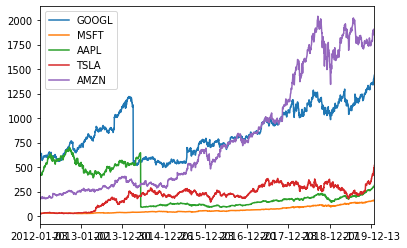

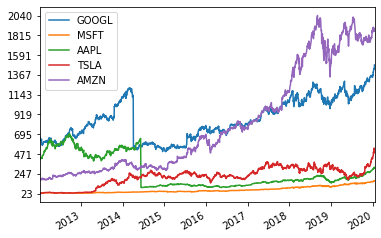

In [71]:
df.loc[:"2012"].plot()
plt.yticks(np.linspace(df.loc[:"2012"].min().min(),df.loc[:"2012"].max().max(),10))
plt.show()

**Para los siguientes ejercicios utiliza información del 2018 a la fecha**

4. Calcula el rendimiento esperado diario de cada emisora

In [74]:
rend=df.loc[:"2018"].pct_change(periods=1)
md=rend.mean()
md

GOOGL   -0.000491
MSFT    -0.001176
AAPL    -0.001046
TSLA    -0.000330
AMZN    -0.000697
dtype: float64

5. Calcula el rendimiento esperado anual de cada emisora

In [75]:
rend=df.loc[:"2018"].pct_change(periods=252)
mAn=rend.mean()
mAn

GOOGL   -0.061877
MSFT    -0.227588
AAPL    -0.093479
TSLA     0.170647
AMZN    -0.085058
dtype: float64

6. Dado los siguientes ponderadores, calcula el rendimiento esperado diario del portafolio

In [78]:
# Generación de ponderadores aleatorios
np.random.seed(314)
w = np.random.random(size=5)
w = w / w.sum()

array([0.26410162, 0.16952705, 0.0763459 , 0.22559905, 0.26442638])

In [81]:
rendimiento_esperado_diario=np.dot(w,md)
rendimiento_esperado_diario

-0.0006676187008021654

7. Dado ponderadores $w$, calcula el rendimiento esperado anual del portafolio

In [105]:
rendimiento_esperado_anual=np.dot(w,mAn)
rendimiento_esperado_anual

-0.0460547670677308

8. Calcula la matriz de variaza/covarianza

In [143]:
matriz_var_covar=df.loc[:"2018"].cov()
Var=np.diag(matriz_var_covar)
matriz_var_covar

,GOOGL,MSFT,AAPL,TSLA,AMZN
GOOGL,8217.236409,1329.025078,2600.310296,1564.294735,8631.693302
MSFT,1329.025078,398.126190,544.734977,-71.061771,2280.061888
AAPL,2600.310296,544.734977,1152.018908,575.433137,3237.224201
TSLA,1564.294735,-71.061771,575.433137,3112.286422,-2387.749160
AMZN,8631.693302,2280.061888,3237.224201,-2387.749160,29923.661669


9. Calcula la varianza anual del portafolio

In [136]:
v_aux=np.array(mAn).reshape(5,1)
var=np.dot(v_aux.T,np.dot(matriz_var_covar,v_aux))
var=var[0][0]
var

714.025297239169

10. Calcula la desviación estándar anual del portafolio

In [137]:
ds=var_anual[0][0]**0.5

11. Para cada ticker, calcula la distribución a posteriori de su rendimiento $\mu_r$ asumiendo una distribución a priori normal y $\sigma_r$ conocida (asume que $\sigma_r$ es la desviación estándard muestral)

    * Para cada ticker, ¿cuál es la probabilida de que $\mu_r$ se positivo? ($\forall r. p(\mu_r) > 0$)
    * Cómo elegiste los hyperparámetros de la distribución a priori?

In [153]:
import scipy.stats
from scipy.stats import norm
def media_y_var_posteriori(Mp,Vp,Vpob,n):
    M=[]
    V=[]
    for mp,vp,vpob in zip(Mp,Vp,Vpob):
        v=(1/vp+n/vpob)**-1
        m=v*(mp/vp+n*mp/vpob)
        M.append(m)
        V.append(v)
    return M,V
    
#Hiperparámetros: media: rendimiento_esperado_anual,varianza: varianza del rendimiento anual
M,V=media_y_var_posteriori(mAn,Var,Var,len(rend))
#Probabilidad que el rendimiento medio sea positivo:
P=[]
for m,v,l in zip(M,V,l_tickers):
    p=norm.cdf(0,m,v**0.5)
    P.append(1-p)
    print(f"Probabilidad (a posteriori) de tener un rendimiento esperado positivo en {l} es: {round(100*(1-p),3)}%")

Probabilidad (a posteriori) de tener un rendimiento esperado positivo en GOOGL es: 49.381%
Probabilidad (a posteriori) de tener un rendimiento esperado positivo en MSFT es: 39.778%
Probabilidad (a posteriori) de tener un rendimiento esperado positivo en AAPL es: 47.506%
Probabilidad (a posteriori) de tener un rendimiento esperado positivo en TSLA es: 52.77%
Probabilidad (a posteriori) de tener un rendimiento esperado positivo en AMZN es: 49.554%
